# K-MEANS

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [22]:
data = pd.read_csv(r'..\data\data_processed\data_processed.csv')

In [ ]:
X = data.drop('Target', axis = 1)
y = data['Target']

## Tìm k

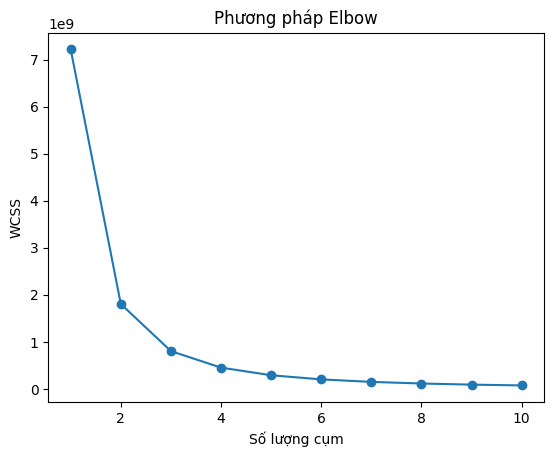

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm')
plt.ylabel('WCSS')
plt.show()
# plt.savefig('find_k.png')

## Huấn luyện mô hình

In [26]:
# Huấn luyện KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)


## Trực quan hóa

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids = pca.transform(kmeans.cluster_centers_)

c:\Users\NGUYEN PHUONG BICH\HOC_TAP\Machine_Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


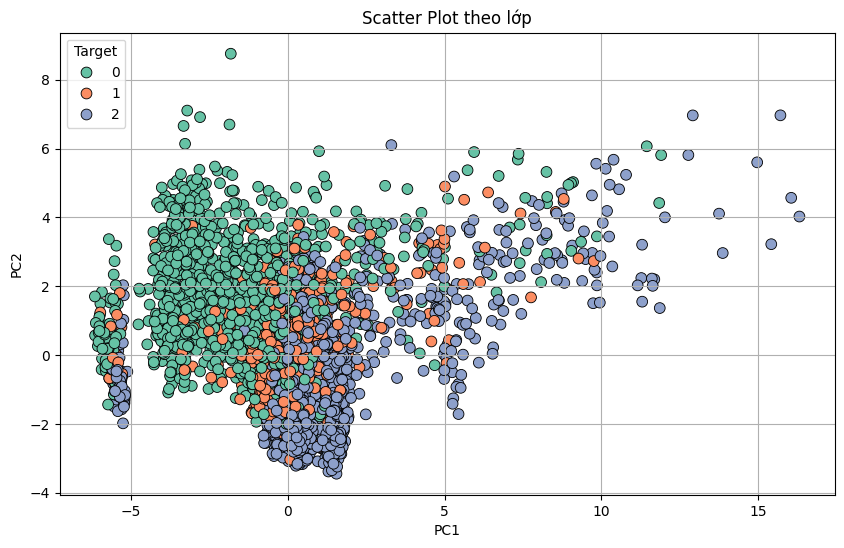

In [28]:
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue=y, palette='Set2', s=60, edgecolor='k')
plt.title('Scatter Plot theo lớp')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()
# plt.savefig('class.png')

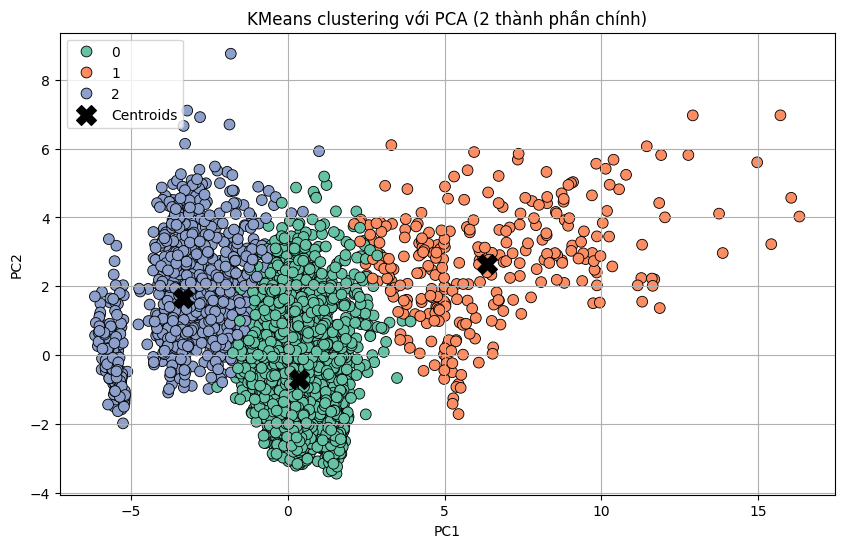

In [29]:

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60, edgecolor='k')

# Vẽ centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('KMeans clustering với PCA (2 thành phần chính)')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('cluster.png')

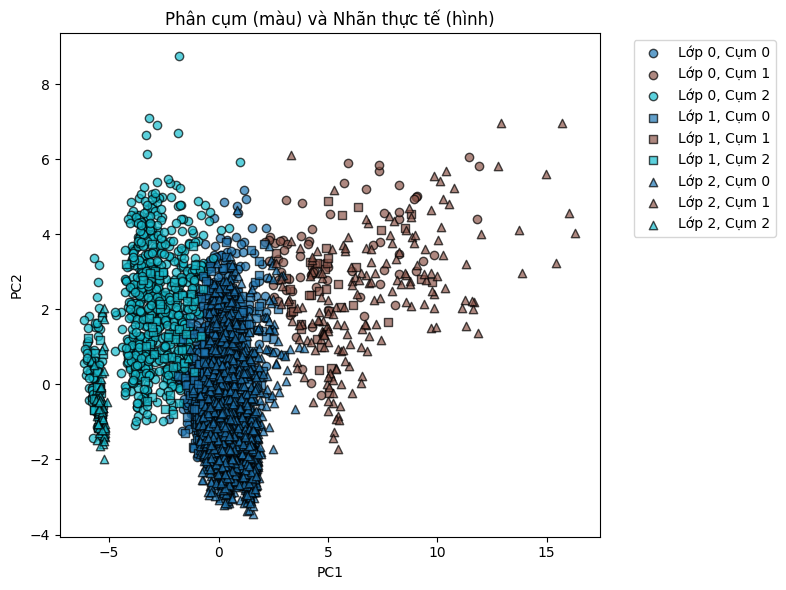

In [30]:
markers = ['o', 's', '^']  # Tuỳ số nhãn
labels_cluster = clusters
unique_labels = np.unique(y)
unique_clusters = np.unique(labels_cluster)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))  # Tạo màu cho từng cụm

plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    for j, cluster in enumerate(unique_clusters):
        mask = (y == label) & (labels_cluster == cluster)
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            color=colors[j],
            marker=markers[i % len(markers)],
            label=f'Lớp {label}, Cụm {cluster}',
            edgecolors='k',  # viền đen cho rõ
            alpha=0.7
        )

plt.title("Phân cụm (màu) và Nhãn thực tế (hình)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# plt.savefig('cluster_shape_color.png')

## Các chỉ số đánh giá

In [31]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score,normalized_mutual_info_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score


print('UNSUPERVISED EVALUTION:')
print('Silhouette Score:', silhouette_score(X, clusters))
print('DBI:', davies_bouldin_score(X, clusters))
print('CH:', calinski_harabasz_score(X, clusters))

print('\nSUPERVISED EVALUTION:')
print('ARI:', adjusted_rand_score(y, clusters))
print('FMI:', fowlkes_mallows_score(y, clusters))
print('NMI:', normalized_mutual_info_score(y, clusters))



UNSUPERVISED EVALUTION:
Silhouette Score: 0.2069422044869048
DBI: 1.9705671720640645
CH: 564.2824748222703

SUPERVISED EVALUTION:
ARI: 0.17847016681048983
FMI: 0.5693595994565889
NMI: 0.1791951314245471
